# PID Parameter Tuning Using Deep Learning


![PID_Deep_Learning](Deep_PID.jpg)
Proses penalaan nilai Kc, τI dan τD pada
pengendali PID menggunakan Deep Learning

### Library yang dibutuhkan

In [42]:
import numpy as np # For matrix math
import matplotlib.pyplot as plt # For plotting

import sys # For printing

### Data Latih

Misalkan error dan delta_error ideal untuk membangkitkan gain PID Kc, tauI dan tauD, sebagai berikut: 

In [43]:
# Data Latih.
X = np.array([
    [1, 1],
    [0.4, 1.2],
    [1.2, 0.1],
    [1, 0.1]
])

# Label untuk Data Latih.
y = np.array([
    [0.25, 4.31, 0.20],
    [0.2, 4.1, 0.1],
    [0.1, 4.0, 0],
    [0.1, 4.0, 0]
])

### Arsitektur Deep Learning
Arsitektur Deep Learning dengan Dua Masukan dan Tiga Keluaran

![arsitektur_DL](DL03.jpg)

In [44]:
# Impor `Sequential` dari` keras.models`
from keras.models import Sequential

# Impor `Dense` dari` keras.layers`
from keras.layers import Dense

# Inisialisasi konstruktor
model = Sequential()

# Tambahkan lapisan masukan 
model.add(Dense(2, activation='sigmoid', input_shape=(2,)))

# Tambahkan satu lapisan tersembunyi
model.add(Dense(3, activation='sigmoid'))

# Tambahkan lapisan keluaran
model.add(Dense(3, activation='sigmoid'))

In [45]:
# Bentuk keluaran model
model.output_shape

# Ringkasan model
model.summary()

# Konfigurasi model
model.get_config()

# Buat daftar semua tensor bobot 
model.get_weights()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 2)                 6         
                                                                 
 dense_4 (Dense)             (None, 3)                 9         
                                                                 
 dense_5 (Dense)             (None, 3)                 12        
                                                                 
Total params: 27 (108.00 Byte)
Trainable params: 27 (108.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


[array([[ 1.0956396 , -0.40167177],
        [-0.1714741 , -0.14249814]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.6540258 ,  1.0830467 ,  0.44223344],
        [ 0.26533806, -0.691223  ,  0.9030155 ]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[ 0.26789904,  0.15584779, -0.4230957 ],
        [-0.9043672 ,  0.6550486 , -0.40327096],
        [ 0.6617336 , -0.674325  ,  0.31031728]], dtype=float32),
 array([0., 0., 0.], dtype=float32)]

Untuk pelatihan Deep Learning silahkan ketikkan skrip berikut.

In [46]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
model.fit(X, y,epochs=100, batch_size=1, verbose=1)

Epoch 1/100
4/4 [==============================] - 1s 2ms/step - loss: 0.5775 - accuracy: 0.7500
Epoch 2/100
4/4 [==============================] - 0s 0s/step - loss: 0.5559 - accuracy: 1.0000
Epoch 3/100
4/4 [==============================] - 0s 0s/step - loss: 0.5344 - accuracy: 1.0000
Epoch 4/100
4/4 [==============================] - 0s 0s/step - loss: 0.5128 - accuracy: 1.0000
Epoch 5/100
4/4 [==============================] - 0s 0s/step - loss: 0.4914 - accuracy: 1.0000
Epoch 6/100
4/4 [==============================] - 0s 0s/step - loss: 0.4700 - accuracy: 1.0000
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 0.4487 - accuracy: 1.0000
Epoch 8/100
4/4 [==============================] - 0s 292us/step - loss: 0.4274 - accuracy: 1.0000
Epoch 9/100
4/4 [==============================] - 0s 5ms/step - loss: 0.4061 - accuracy: 1.0000
Epoch 10/100
4/4 [==============================] - 0s 5ms/step - loss: 0.3849 - accuracy: 1.0000
Epoch 11/100
4/4 [==============

In [47]:
Hasil_Prediksi_Keras = model.predict(X)
print(Hasil_Prediksi_Keras)

1/1 [==============================] - 0s 47ms/step
[[0.24453239 0.8341355  0.18436413]
 [0.25178796 0.82828206 0.18918379]
 [0.24446805 0.8346314  0.18357222]
 [0.24636793 0.83322346 0.18463148]]


### Dicoba diberi masukan e(t) sembarang
Pengujian ke-1

In [48]:
ujicoba1 = np.array([
    [1, 1]
])

In [49]:
ujicoba1

array([[1, 1]])

In [50]:
outDL = model.predict(ujicoba1)

1/1 [==============================] - 0s 63ms/step


In [51]:
outDL

array([[0.24453239, 0.8341355 , 0.18436413]], dtype=float32)

In [52]:
result_Kc   = outDL[0,0]
result_tauI = outDL[0,1]
result_tauD = outDL[0,2]

In [53]:
result_Kc

0.24453239

In [54]:
result_tauI

0.8341355

In [55]:
result_tauD

0.18436413

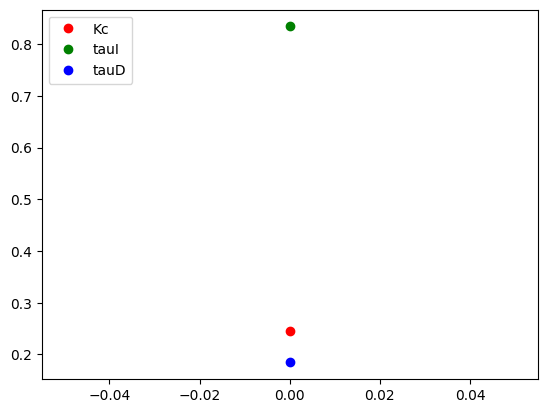

In [56]:
# Visualize 
plt.plot(result_Kc, 'ro', label='Kc')
plt.plot(result_tauI, 'go', label='tauI')
plt.plot(result_tauD, 'bo', label='tauD')

#plt.xlabel('Kc, tauI, tauD');
#plt.legend((result_Kc, result_tauI, result_tauD), ('Kc', 'tauI', 'tauD'))

plt.legend(loc='upper left')
#pylab.ylim(-1.5, 2.0)
plt.show()

# Implementasi Parameter Tuning Menggunakan Deep Learning Pada Pengendali PID sebagai berikut


In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import ipywidgets as wg
from IPython.display import display

In [58]:
n = 100 # time points to plot
tf = 50.0 # final time
SP_start = 2.0 # time of set point change

def process(y,t,u):
    Kp = 4.0
    taup = 3.0
    thetap = 1.0
    if t<(thetap+SP_start):
        dydt = 0.0  # time delay
    else:
        dydt = (1.0/taup) * (-y + Kp * u)
    return dydt

def pidPlot(Kc,tauI,tauD):
    t = np.linspace(0,tf,n) # create time vector
    P= np.zeros(n)          # initialize proportional term
    I = np.zeros(n)         # initialize integral term
    D = np.zeros(n)         # initialize derivative term
    e = np.zeros(n)         # initialize error
    OP = np.zeros(n)        # initialize controller output
    PV = np.zeros(n)        # initialize process variable
    SP = np.zeros(n)        # initialize setpoint
    SP_step = int(SP_start/(tf/(n-1))+1) # setpoint start
    SP[0:SP_step] = 0.0     # define setpoint
    SP[SP_step:n] = 4.0     # step up
    y0 = 0.0                # initial condition
    # loop through all time steps
    for i in range(1,n):
        # simulate process for one time step
        ts = [t[i-1],t[i]]         # time interval
        y = odeint(process,y0,ts,args=(OP[i-1],))  # compute next step
        y0 = y[1]                  # record new initial condition
        # calculate new OP with PID
        PV[i] = y[1]               # record PV
        e[i] = SP[i] - PV[i]       # calculate error = SP - PV
        dt = t[i] - t[i-1]         # calculate time step
        P[i] = Kc * e[i]           # calculate proportional term
        I[i] = I[i-1] + (Kc/tauI) * e[i] * dt  # calculate integral term
        D[i] = -Kc * tauD * (PV[i]-PV[i-1])/dt # calculate derivative term
        OP[i] = P[i] + I[i] + D[i] # calculate new controller output
        
    # plot PID response
    plt.figure(1,figsize=(15,7))
    plt.subplot(2,2,1)
    plt.plot(t,SP,'k-',linewidth=2,label='Setpoint (SP)')
    plt.plot(t,PV,'r:',linewidth=2,label='Process Variable (PV)')
    plt.legend(loc='best')
    plt.subplot(2,2,2)
    plt.plot(t,P,'g.-',linewidth=2,label=r'Proportional = $K_c \; e(t)$')
    plt.plot(t,I,'b-',linewidth=2,label=r'Integral = $\frac{K_c}{\tau_I} \int_{i=0}^{n_t} e(t) \; dt $')
    plt.plot(t,D,'r--',linewidth=2,label=r'Derivative = $-K_c \tau_D \frac{d(PV)}{dt}$')    
    plt.legend(loc='best')
    plt.subplot(2,2,3)
    plt.plot(t,e,'m--',linewidth=2,label='Error (e=SP-PV)')
    plt.legend(loc='best')
    plt.subplot(2,2,4)
    plt.plot(t,OP,'b--',linewidth=2,label='Controller Output (OP)')
    plt.legend(loc='best')
    plt.xlabel('time')
    
Kc_slide = result_Kc
tauI_slide = result_tauI
tauD_slide = result_tauD
wg.interact(pidPlot, Kc=Kc_slide, tauI=tauI_slide, tauD=tauD_slide)

interactive(children=(FloatSlider(value=0.24453239142894745, description='Kc', max=0.7335971742868423, min=-0.…

<function __main__.pidPlot(Kc, tauI, tauD)>

### Dicoba diberi masukan e(t) sembarang
Pengujian ke-2

In [59]:
ujicoba2 = np.array([
    [0.4, 1.2]
])

In [60]:
ujicoba2

array([[0.4, 1.2]])

In [61]:
outDL = model.predict(ujicoba2)

1/1 [==============================] - 0s 16ms/step


In [62]:
outDL

array([[0.25178796, 0.82828206, 0.18918379]], dtype=float32)

In [63]:
result_Kc   = outDL[0,0]
result_tauI = outDL[0,1]
result_tauD = outDL[0,2]

In [64]:
result_Kc

0.25178796

In [65]:
result_tauI

0.82828206

In [66]:
result_tauD

0.18918379

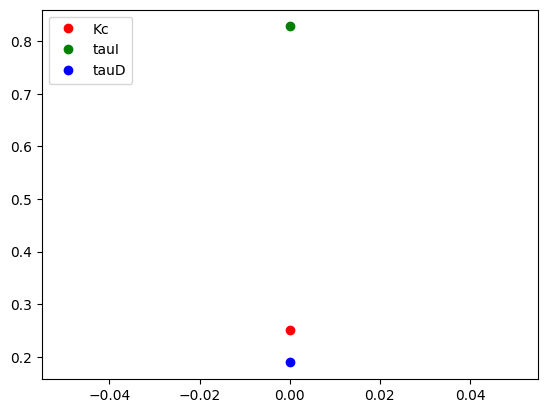

In [67]:
# Visualize 
plt.plot(result_Kc, 'ro', label='Kc')
plt.plot(result_tauI, 'go', label='tauI')
plt.plot(result_tauD, 'bo', label='tauD')

#plt.xlabel('Kc, tauI, tauD');
#plt.legend((result_Kc, result_tauI, result_tauD), ('Kc', 'tauI', 'tauD'))

plt.legend(loc='upper left')
#pylab.ylim(-1.5, 2.0)
plt.show()

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import ipywidgets as wg
from IPython.display import display

In [69]:
n = 100 # time points to plot
tf = 50.0 # final time
SP_start = 2.0 # time of set point change

def process(y,t,u):
    Kp = 4.0
    taup = 3.0
    thetap = 1.0
    if t<(thetap+SP_start):
        dydt = 0.0  # time delay
    else:
        dydt = (1.0/taup) * (-y + Kp * u)
    return dydt

def pidPlot(Kc,tauI,tauD):
    t = np.linspace(0,tf,n) # create time vector
    P= np.zeros(n)          # initialize proportional term
    I = np.zeros(n)         # initialize integral term
    D = np.zeros(n)         # initialize derivative term
    e = np.zeros(n)         # initialize error
    OP = np.zeros(n)        # initialize controller output
    PV = np.zeros(n)        # initialize process variable
    SP = np.zeros(n)        # initialize setpoint
    SP_step = int(SP_start/(tf/(n-1))+1) # setpoint start
    SP[0:SP_step] = 0.0     # define setpoint
    SP[SP_step:n] = 4.0     # step up
    y0 = 0.0                # initial condition
    # loop through all time steps
    for i in range(1,n):
        # simulate process for one time step
        ts = [t[i-1],t[i]]         # time interval
        y = odeint(process,y0,ts,args=(OP[i-1],))  # compute next step
        y0 = y[1]                  # record new initial condition
        # calculate new OP with PID
        PV[i] = y[1]               # record PV
        e[i] = SP[i] - PV[i]       # calculate error = SP - PV
        dt = t[i] - t[i-1]         # calculate time step
        P[i] = Kc * e[i]           # calculate proportional term
        I[i] = I[i-1] + (Kc/tauI) * e[i] * dt  # calculate integral term
        D[i] = -Kc * tauD * (PV[i]-PV[i-1])/dt # calculate derivative term
        OP[i] = P[i] + I[i] + D[i] # calculate new controller output
        
    # plot PID response
    plt.figure(1,figsize=(15,7))
    plt.subplot(2,2,1)
    plt.plot(t,SP,'k-',linewidth=2,label='Setpoint (SP)')
    plt.plot(t,PV,'r:',linewidth=2,label='Process Variable (PV)')
    plt.legend(loc='best')
    plt.subplot(2,2,2)
    plt.plot(t,P,'g.-',linewidth=2,label=r'Proportional = $K_c \; e(t)$')
    plt.plot(t,I,'b-',linewidth=2,label=r'Integral = $\frac{K_c}{\tau_I} \int_{i=0}^{n_t} e(t) \; dt $')
    plt.plot(t,D,'r--',linewidth=2,label=r'Derivative = $-K_c \tau_D \frac{d(PV)}{dt}$')    
    plt.legend(loc='best')
    plt.subplot(2,2,3)
    plt.plot(t,e,'m--',linewidth=2,label='Error (e=SP-PV)')
    plt.legend(loc='best')
    plt.subplot(2,2,4)
    plt.plot(t,OP,'b--',linewidth=2,label='Controller Output (OP)')
    plt.legend(loc='best')
    plt.xlabel('time')
    
Kc_slide = result_Kc
tauI_slide = result_tauI
tauD_slide = result_tauD
wg.interact(pidPlot, Kc=Kc_slide, tauI=tauI_slide, tauD=tauD_slide)

interactive(children=(FloatSlider(value=0.2517879605293274, description='Kc', max=0.7553638815879822, min=-0.2…

<function __main__.pidPlot(Kc, tauI, tauD)>

### Dicoba diberi masukan e(t) sembarang
Pengujian ke-3

In [70]:
ujicoba3 = np.array([
    [1.2, 0.1]
])

In [71]:
ujicoba3

array([[1.2, 0.1]])

In [72]:
outDL = model.predict(ujicoba3)

1/1 [==============================] - 0s 31ms/step


In [73]:
outDL

array([[0.24446805, 0.8346314 , 0.18357222]], dtype=float32)

In [74]:
result_Kc   = outDL[0,0]
result_tauI = outDL[0,1]
result_tauD = outDL[0,2]

In [75]:
result_Kc

0.24446805

In [76]:
result_tauI

0.8346314

In [77]:
result_tauD

0.18357222

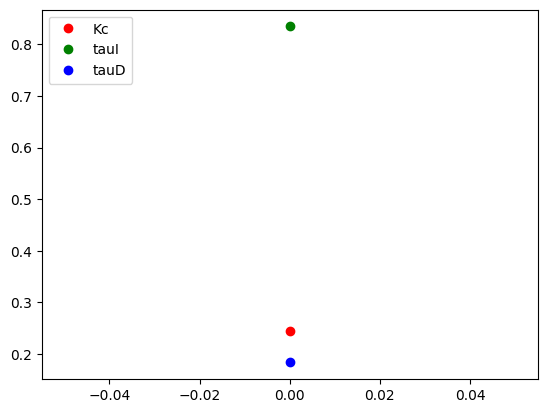

In [78]:
# Visualize 
plt.plot(result_Kc, 'ro', label='Kc')
plt.plot(result_tauI, 'go', label='tauI')
plt.plot(result_tauD, 'bo', label='tauD')

#plt.xlabel('Kc, tauI, tauD');
#plt.legend((result_Kc, result_tauI, result_tauD), ('Kc', 'tauI', 'tauD'))

plt.legend(loc='upper left')
#pylab.ylim(-1.5, 2.0)
plt.show()

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import ipywidgets as wg
from IPython.display import display

In [80]:
n = 100 # time points to plot
tf = 50.0 # final time
SP_start = 2.0 # time of set point change

def process(y,t,u):
    Kp = 4.0
    taup = 3.0
    thetap = 1.0
    if t<(thetap+SP_start):
        dydt = 0.0  # time delay
    else:
        dydt = (1.0/taup) * (-y + Kp * u)
    return dydt

def pidPlot(Kc,tauI,tauD):
    t = np.linspace(0,tf,n) # create time vector
    P= np.zeros(n)          # initialize proportional term
    I = np.zeros(n)         # initialize integral term
    D = np.zeros(n)         # initialize derivative term
    e = np.zeros(n)         # initialize error
    OP = np.zeros(n)        # initialize controller output
    PV = np.zeros(n)        # initialize process variable
    SP = np.zeros(n)        # initialize setpoint
    SP_step = int(SP_start/(tf/(n-1))+1) # setpoint start
    SP[0:SP_step] = 0.0     # define setpoint
    SP[SP_step:n] = 4.0     # step up
    y0 = 0.0                # initial condition
    # loop through all time steps
    for i in range(1,n):
        # simulate process for one time step
        ts = [t[i-1],t[i]]         # time interval
        y = odeint(process,y0,ts,args=(OP[i-1],))  # compute next step
        y0 = y[1]                  # record new initial condition
        # calculate new OP with PID
        PV[i] = y[1]               # record PV
        e[i] = SP[i] - PV[i]       # calculate error = SP - PV
        dt = t[i] - t[i-1]         # calculate time step
        P[i] = Kc * e[i]           # calculate proportional term
        I[i] = I[i-1] + (Kc/tauI) * e[i] * dt  # calculate integral term
        D[i] = -Kc * tauD * (PV[i]-PV[i-1])/dt # calculate derivative term
        OP[i] = P[i] + I[i] + D[i] # calculate new controller output
        
    # plot PID response
    plt.figure(1,figsize=(15,7))
    plt.subplot(2,2,1)
    plt.plot(t,SP,'k-',linewidth=2,label='Setpoint (SP)')
    plt.plot(t,PV,'r:',linewidth=2,label='Process Variable (PV)')
    plt.legend(loc='best')
    plt.subplot(2,2,2)
    plt.plot(t,P,'g.-',linewidth=2,label=r'Proportional = $K_c \; e(t)$')
    plt.plot(t,I,'b-',linewidth=2,label=r'Integral = $\frac{K_c}{\tau_I} \int_{i=0}^{n_t} e(t) \; dt $')
    plt.plot(t,D,'r--',linewidth=2,label=r'Derivative = $-K_c \tau_D \frac{d(PV)}{dt}$')    
    plt.legend(loc='best')
    plt.subplot(2,2,3)
    plt.plot(t,e,'m--',linewidth=2,label='Error (e=SP-PV)')
    plt.legend(loc='best')
    plt.subplot(2,2,4)
    plt.plot(t,OP,'b--',linewidth=2,label='Controller Output (OP)')
    plt.legend(loc='best')
    plt.xlabel('time')
    
Kc_slide = result_Kc
tauI_slide = result_tauI
tauD_slide = result_tauD
wg.interact(pidPlot, Kc=Kc_slide, tauI=tauI_slide, tauD=tauD_slide)

interactive(children=(FloatSlider(value=0.24446804821491241, description='Kc', max=0.7334041446447372, min=-0.…

<function __main__.pidPlot(Kc, tauI, tauD)>